In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kymatio import Scattering2D
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage  as ndimage
from sklearn.cluster import KMeans

In [2]:
# Load the NIfTI file
month1 = nib.load('anita_1.nii')
month1_data = month1.get_fdata()
month1_data = month1_data/np.max(month1_data)

month3 = nib.load('anita_3.nii')
month3_data = month3.get_fdata()
month3_data = month3_data/np.max(month3_data)

## Segmenting month 1 data

In [3]:

# Assuming `mri_volume` is the 3D numpy array representing the brain MRI volume
# Step 1: Flatten the 3D volume into a 1D array
mri_volume = month1_data
flattened_volume = mri_volume.flatten().reshape(-1, 1)

# Step 2: Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(flattened_volume)

# Step 3: Get the labels and reshape them back to the original 3D shape
labels = kmeans.labels_.reshape(mri_volume.shape)

# Step 4: Sort clusters by mean intensity to identify bone cluster
# Calculate the mean intensity of each cluster
cluster_means = [np.mean(mri_volume[labels == i]) for i in range(3)]
# Sort clusters by mean intensity
sorted_clusters = np.argsort(cluster_means)

# Assume the highest mean intensity cluster is bone, and the lowest is background
background_cluster = sorted_clusters[0]
bone_cluster = sorted_clusters[2]  # Assuming the highest intensity corresponds to bone

# Step 5: Create binary masks
bone_mask = (labels == bone_cluster).astype(np.uint8)
other_tissues_mask = ((labels == sorted_clusters[1]) | (labels == bone_cluster)).astype(np.uint8)

# `bone_mask` is now a binary mask for bones, and `other_tissues_mask` includes all valued areas

c:\Users\abhiv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


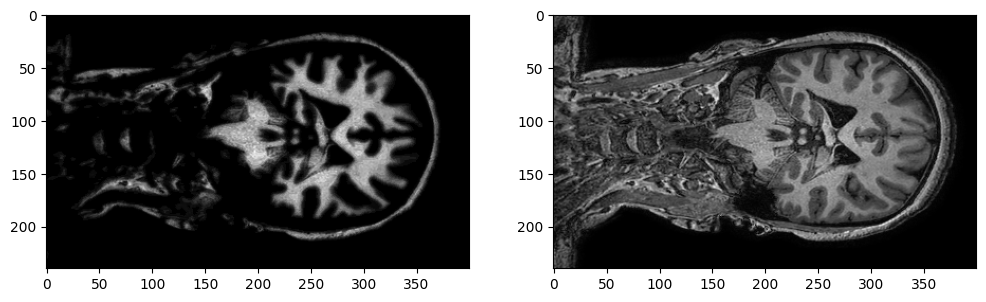

In [4]:
idx = 160
fig, ax = plt.subplots(1,2, figsize=(12,4))

# sliced_bone_mask = bone_mask[:,:,idx]
# sliced_mri_volume = mri_volume[:,:,idx]
smooth_bone_mask = ndimage.gaussian_filter(bone_mask*10, sigma=2)
sliced_mri = mri_volume[:,idx,:]
sliced_mask = smooth_bone_mask[:,idx,:]
# ax[0].imshow(bone_mask[:,:,idx], cmap='gray')
plt.set_cmap('gray')
ax[0].imshow(np.where(sliced_mask!=0, sliced_mri*sliced_mask, 0))
# ax[1].imshow(other_tissues_mask[:,:,idx], cmap='gray')
ax[1].imshow(mri_volume[:,idx,:])

### Generated Data for Month 1

In [5]:
bone_mask_month_1 = bone_mask
smooth_bone_mask_month_1 = smooth_bone_mask
masked_bone_month_1 = smooth_bone_mask_month_1 * month1_data

## Segmenting month 3 data

In [6]:

# Assuming `mri_volume` is the 3D numpy array representing the brain MRI volume
# Step 1: Flatten the 3D volume into a 1D array
mri_volume = month3_data
flattened_volume = mri_volume.flatten().reshape(-1, 1)

# Step 2: Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(flattened_volume)

# Step 3: Get the labels and reshape them back to the original 3D shape
labels = kmeans.labels_.reshape(mri_volume.shape)

# Step 4: Sort clusters by mean intensity to identify bone cluster
# Calculate the mean intensity of each cluster
cluster_means = [np.mean(mri_volume[labels == i]) for i in range(3)]
# Sort clusters by mean intensity
sorted_clusters = np.argsort(cluster_means)

# Assume the highest mean intensity cluster is bone, and the lowest is background
background_cluster = sorted_clusters[0]
bone_cluster = sorted_clusters[2]  # Assuming the highest intensity corresponds to bone

# Step 5: Create binary masks
bone_mask = (labels == bone_cluster).astype(np.uint8)
other_tissues_mask = ((labels == sorted_clusters[1]) | (labels == bone_cluster)).astype(np.uint8)

# `bone_mask` is now a binary mask for bones, and `other_tissues_mask` includes all valued areas

c:\Users\abhiv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


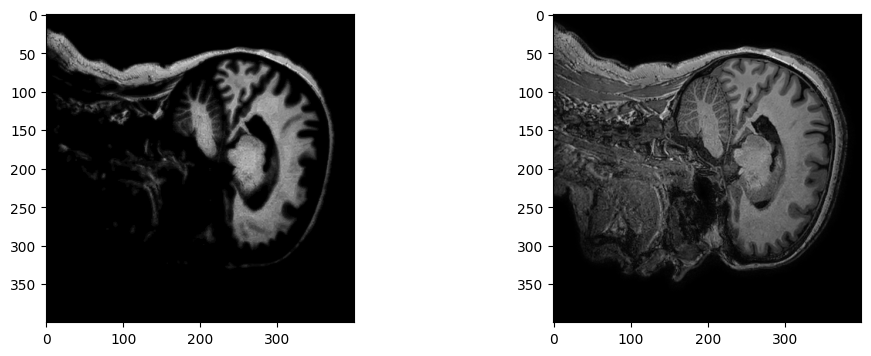

In [24]:
idx = 100
fig, ax = plt.subplots(1,2, figsize=(12,4))

# sliced_bone_mask = bone_mask[:,:,idx]
# sliced_mri_volume = mri_volume[:,:,idx]
smooth_bone_mask = ndimage.gaussian_filter(bone_mask*10, sigma=2)
sliced_mri = mri_volume[idx,:,:]
sliced_mask = smooth_bone_mask[idx,:,:]
# ax[0].imshow(bone_mask[:,:,idx], cmap='gray')
plt.set_cmap('gray')
ax[0].imshow(np.where(sliced_mask!=0, sliced_mri*sliced_mask, 0))
# ax[1].imshow(other_tissues_mask[:,:,idx], cmap='gray')
ax[1].imshow(mri_volume[idx,:,:])

### Generated Data for Month 3

In [8]:
bone_mask_month_3 = bone_mask
smooth_bone_mask_month_3 = smooth_bone_mask
masked_bone_month_3 = smooth_bone_mask_month_3 * month3_data

## Separator Planes

In [9]:
# Assuming `masked_bone_month_1` is the 3D numpy array representing the MRI volume
# Step 1: Calculate the Euclidean distance of each voxel from the center of the volume

# Get the shape of the MRI volume
x_dim, y_dim, z_dim = masked_bone_month_1.shape
center = np.array([x_dim / 2, y_dim / 2, z_dim / 2])

# Generate a grid of coordinates for each voxel
x, y, z = np.indices(masked_bone_month_1.shape)

# Calculate the Euclidean distance from the center for each voxel
distances = np.sqrt((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2)

# Step 2: Compute the cumulative Euclidean distance along each axis

# Sum over all distances to get the total distance for normalization
total_distance = np.sum(distances)

# Cumulative distance along each axis
cumulative_distance_x = np.cumsum(np.sum(np.sum(distances, axis=1), axis=1))
cumulative_distance_y = np.cumsum(np.sum(np.sum(distances, axis=0), axis=1))
cumulative_distance_z = np.cumsum(np.sum(np.sum(distances, axis=0), axis=0))

# Step 3: Find the index where the cumulative distance is closest to half the total distance
half_distance = total_distance / 2

# Find the splitting index for each axis
x_split = np.abs(cumulative_distance_x - half_distance).argmin()
y_split = np.abs(cumulative_distance_y - half_distance).argmin()
z_split = np.abs(cumulative_distance_z - half_distance).argmin()

print(f"x-axis split index: {x_split}")
print(f"y-axis split index: {y_split}")
print(f"z-axis split index: {z_split}")


x-axis split index: 119
y-axis split index: 199
z-axis split index: 199


In [10]:
masked_bone_month_1.shape

(240, 400, 400)

In [11]:
import numpy as np
from scipy.optimize import minimize

# Assuming `masked_bone_month_1` is the 3D numpy array representing the MRI volume

# Step 1: Define a function to calculate the Euclidean distance for each voxel from the origin
x_dim, y_dim, z_dim = masked_bone_month_1.shape
center = np.array([x_dim / 2, y_dim / 2, z_dim / 2])
x, y, z = np.indices(masked_bone_month_1.shape)

# Euclidean distance of each voxel from the center
distances = np.sqrt((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2)
total_distance = np.sum(distances)

# Step 2: Define a function that calculates the balance of Euclidean distance split by a plane
def distance_split(params):
    # Unpack plane parameters
    a, b, c, d = params
    norm = np.sqrt(a**2 + b**2 + c**2)
    a, b, c, d = a / norm, b / norm, c / norm, d / norm  # Normalize the normal vector

    # Calculate signed distance of each point from the plane
    signed_distances = a * x + b * y + c * z + d
    mask = signed_distances > 0  # Points on one side of the plane
    
    # Calculate Euclidean distances for points on each side
    positive_side_distance = np.sum(distances[mask])
    negative_side_distance = total_distance - positive_side_distance
    
    # Return the absolute difference in Euclidean distances (we want to minimize this)
    return abs(positive_side_distance - negative_side_distance)

# Step 3: Initialize and run the optimization
initial_params = np.array([1, 1, 1, 0])  # Initial guess for (a, b, c, d)
result = minimize(distance_split, initial_params, method='Powell')

# Extract optimized plane parameters
a_opt, b_opt, c_opt, d_opt = result.x
print(f"Optimized plane parameters: a={a_opt}, b={b_opt}, c={c_opt}, d={d_opt}")

# The plane equation for the optimal split is `a*x + b*y + c*z + d = 0`


Optimized plane parameters: a=3.587928961545842, b=3.587928961545842, c=3.587928961545842, d=-1.5994280624162824


In [12]:
m1x, m1y, m1z = mri_volume.shape
m1constraints = {}
for i in range(m1x):
    if np.count_nonzero(smooth_bone_mask_month_1[i,:,:]):
        m1constraints['x']=[i]
        break
for i in range(m1x-1,0,-1):
    if np.count_nonzero(smooth_bone_mask_month_1[i,:,:]):
        m1constraints['x'].append(i)
        break
for i in range(m1y):
    if np.count_nonzero(smooth_bone_mask_month_1[:,i,:]):
        m1constraints['y']=[i]
        break
for i in range(m1y-1,0,-1):
    if np.count_nonzero(smooth_bone_mask_month_1[:,i,:]):
        m1constraints['y'].append(i)
        break
for i in range(m1z):
    if np.count_nonzero(smooth_bone_mask_month_1[:,:,i]):
        m1constraints['z']=[i]
        break
for i in range(m1z-1,0,-1):
    if np.count_nonzero(smooth_bone_mask_month_1[:,:,i]):
        m1constraints['z'].append(i)
        break

In [13]:
m3x, m3y, m3z = mri_volume.shape
m3constraints = {}
for i in range(m3x):
    if np.count_nonzero(smooth_bone_mask_month_3[i,:,:]):
        m3constraints['x']=[i]
        break
for i in range(m3x-1,0,-1):
    if np.count_nonzero(smooth_bone_mask_month_3[i,:,:]):
        m3constraints['x'].append(i)
        break
for i in range(m3y):
    if np.count_nonzero(smooth_bone_mask_month_3[:,i,:]):
        m3constraints['y']=[i]
        break
for i in range(m3y-1,0,-1):
    if np.count_nonzero(smooth_bone_mask_month_3[:,i,:]):
        m3constraints['y'].append(i)
        break
for i in range(m3z):
    if np.count_nonzero(smooth_bone_mask_month_3[:,:,i]):
        m3constraints['z']=[i]
        break
for i in range(m3z-1,0,-1):
    if np.count_nonzero(smooth_bone_mask_month_3[:,:,i]):
        m3constraints['z'].append(i)
        break

In [35]:
print(m1constraints)
print(m3constraints)

{'x': [0, 239], 'y': [4, 351], 'z': [0, 373]}
{'x': [0, 239], 'y': [14, 354], 'z': [0, 376]}


In [15]:
diff_months = np.abs(smooth_bone_mask_month_1 - smooth_bone_mask_month_3)

In [40]:
nifti_img = nib.Nifti1Image(bone_mask_month_1, np.eye(4))
nib.save(nifti_img, './saved-data/bone_mask_month_1.nii')
nifti_img = nib.Nifti1Image(bone_mask_month_3, np.eye(4))   
nib.save(nifti_img, './saved-data/bone_mask_month_3.nii')